SIR model počáteční kód

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

N = 1_000_000
I0 = 20
R0 = 0
S0 = N - I0
t = np.linspace(0, 365, 365)
def vypocitej (infekcni_doba,reprodukcni_cislo,nazev):
    gamma = 1.0 / infekcni_doba
    beta = reprodukcni_cislo * gamma
    y0 = [S0 / N, I0 / N, R0 / N]
    ret = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = ret.T
    S_abs = S * N
    I_abs = I * N
    R_abs = R * N
    vrchol_den = t[np.argmax(I_abs)]
    vrchol_lidi = np.max(I_abs)
    nakazeno = R_abs[-1]
    nenakazeno = S_abs[-1]
    doba_epidemie = t[next(i for i in range(len(I_abs)) if I_abs[i] < 1 and t[i] > vrchol_den)]
    print(f"1. Vrchol epidemie: den {vrchol_den:.1f}, počet nakažených: {vrchol_lidi:,.0f}")
    print(f"2. Epidemie trvá přibližně {doba_epidemie:.1f} dní")
    print(f"3. Celkem onemocnělo: {nakazeno:,.0f}")
    print(f"4. Nikdy neonemocnělo: {nenakazeno:,.0f}")

    plt.figure(figsize=(8, 4))
    plt.plot(t, S_abs, label='S – náchylní')
    plt.plot(t, I_abs, label='I – nakažení')
    plt.plot(t, R_abs, label='R – zotavení')
    plt.title(f"SIR model – {nazev} (R₀={reprodukcni_cislo})")
    plt.xlabel('Dny')
    plt.ylabel('Počet jedinců')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()




Model pro chřipku

1. Vrchol epidemie: den 96.3, počet nakažených: 63,035
2. Epidemie trvá přibližně 260.7 dní
3. Celkem onemocnělo: 582,834
4. Nikdy neonemocnělo: 417,166


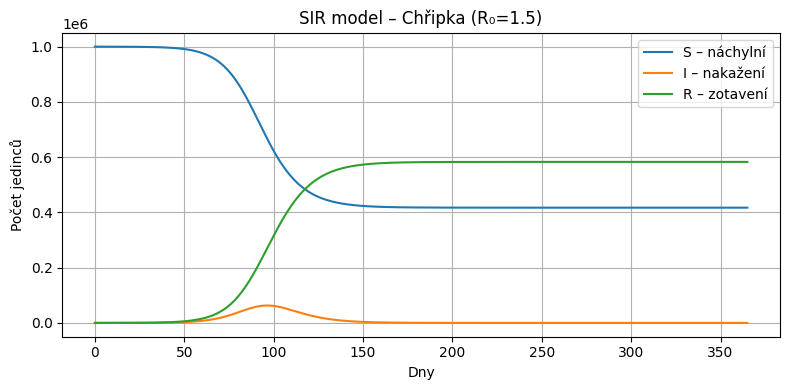

In [2]:
vypocitej(5.0, 1.5, "Chřipka")


Model pro příušnice

1. Vrchol epidemie: den 22.1, počet nakažených: 476,347
2. Epidemie trvá přibližně 120.3 dní
3. Celkem onemocnělo: 993,023
4. Nikdy neonemocnělo: 6,977


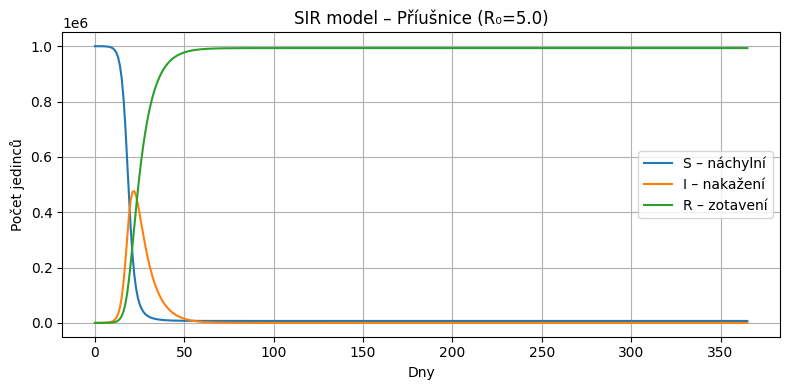

In [3]:
vypocitej(7.0, 5.0, "Příušnice")


Ebola

1. Vrchol epidemie: den 117.3, počet nakažených: 153,430
2. Epidemie trvá přibližně 358.0 dní
3. Celkem onemocnělo: 796,818
4. Nikdy neonemocnělo: 203,181


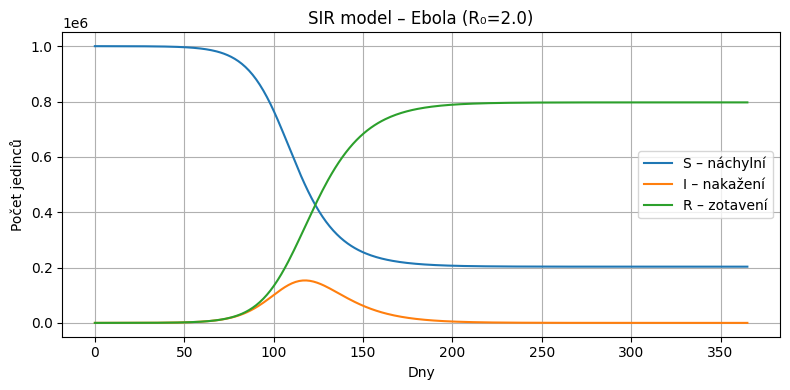

In [4]:
vypocitej(11.0, 2.0, "Ebola")


Tuberkuloza

1. Vrchol epidemie: den 0.0, počet nakažených: 20
2. Epidemie trvá přibližně 299.8 dní
3. Celkem onemocnělo: 65
4. Nikdy neonemocnělo: 999,935


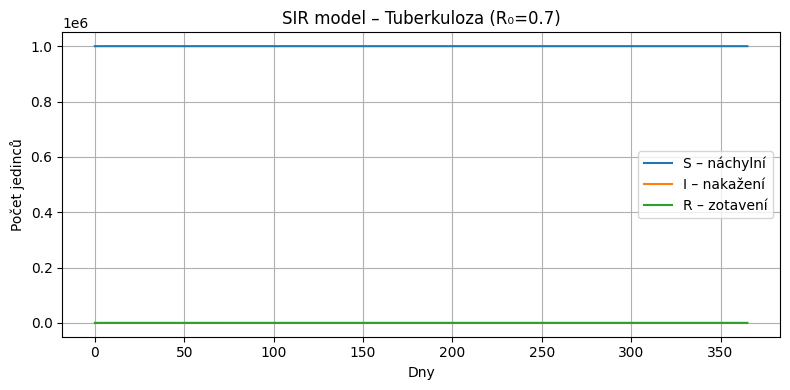

In [5]:
vypocitej(30.0, 0.7, "Tuberkuloza")


Spalničky

1. Vrchol epidemie: den 10.0, počet nakažených: 706,217
2. Epidemie trvá přibližně 119.3 dní
3. Celkem onemocnělo: 999,994
4. Nikdy neonemocnělo: 6


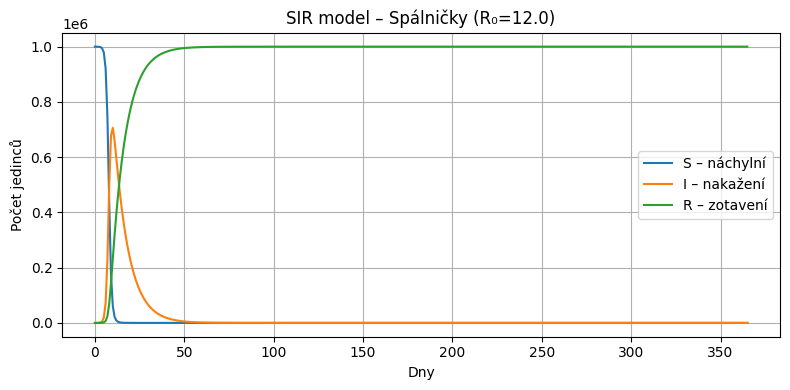

In [6]:
vypocitej(8.0, 12.0, "Spálničky")
